# Complex System Simulation: Corals and Flows
#### _Group 12: Esther Bakels (12362980), Loes Bijman (15211312), Aleksandar Jacimovic (15278247), Boyan Mihaylov (15067602)_

## 1. Imports / Preliminaries

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import custom modules
import vis_tools as vt
import dla_model as dm
import dla_simulation as ds
import cs_measures as csm

from importlib import reload

## 2. Basic DLA Model

In [15]:
# Reload modules
reload(vt)
reload(dm)

<module 'dla_model' from 'd:\\GitHub\\complex-system-simulation\\Project\\Code\\dla_model.py'>

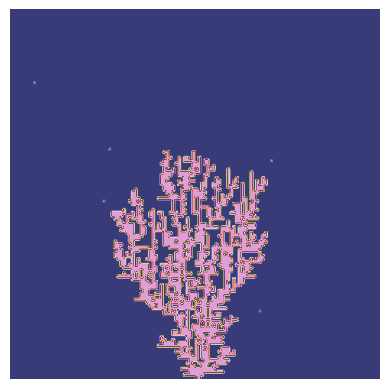

In [3]:
# Time / space parameters
size = 128
steps = 2000

# Environment parameters
Moore = False
obstacle = None
drift_vec = [0, -1]
sun_vec = [0, -1]
periodic = (False, False)
n_seeds = 1

# Initialize lattice
seeds = dm.init_seeds_bottom(size, n_seeds)
lattice = dm.init_lattice(size, seeds)

# Initialize obstacle lattice
if obstacle is not None:
    boxes = np.array([[15,17,19,35,10,20], [40, 45, 50, 55, 60, 55]])
    obstacle = dm.init_obstacle_lattice(size, boxes=boxes, seed_coords=seeds)
    print(np.sum(obstacle))

# Initialize particles
particle_density = 0.1
particles = dm.init_particles(lattice, particle_density, obstacles=obstacle)

# Arrays for storing time frames
# lattice_frames = np.empty((steps, size, size, size))
lattice_frames = np.empty((steps, size, size))
particles_frames = np.empty_like(lattice_frames)

current_lattice = np.array(lattice)
current_particles = np.array(particles)
for step in range(steps):
    
    # Record current state
    lattice_frames[step] = np.array(current_lattice)
    particles_frames[step] = dm.particles_to_lattice(current_particles, size)

    # Move particles
    current_particles = dm.move_particles_diffuse(current_particles, current_lattice, periodic=periodic, moore=Moore, obstacles=obstacle, drift_vec=drift_vec, regen_bndry=False)

    # Aggregate particles
    current_lattice, current_particles = dm.aggregate_particles(current_particles, current_lattice, None, moore=Moore, obstacles=obstacle, sun_vec=sun_vec)
    # print(f"step {step}: {current_lattice}")

# vt.animate_lattice(lattice_frames, interval=100)
vt.animate_lattice((lattice_frames*5 + particles_frames)/6, interval=10)
# obstacle_frames = np.array([obstacle for _ in lattice_frames])
# vt.animate_lattice((lattice_frames*5 + particles_frames + obstacle*2)/8, interval=100)

## 3. Fractal Dimension

In [10]:
# Reload modules
reload(csm)
reload(vt)

<module 'vis_tools' from 'd:\\GitHub\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

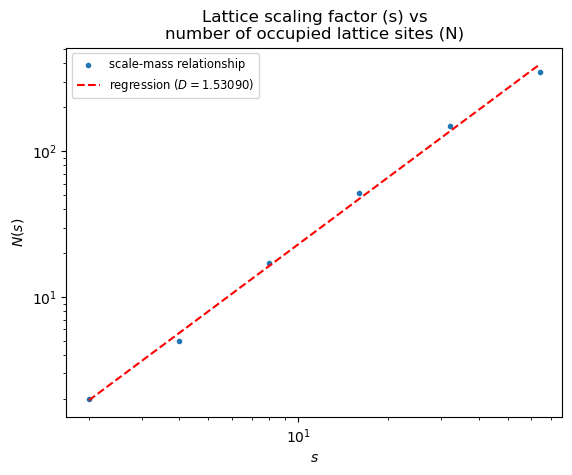

In [18]:
fractal_dims, scales, n_boxes, coeffs = csm.fractal_dimension_clusters(current_lattice, fit=True)

vt.plot_fractal_dimension(scales, n_boxes, coeffs)

## 4. Branching Distribution

In [10]:
reload(csm)
reload(vt)

<module 'vis_tools' from 'd:\\GitHub\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit


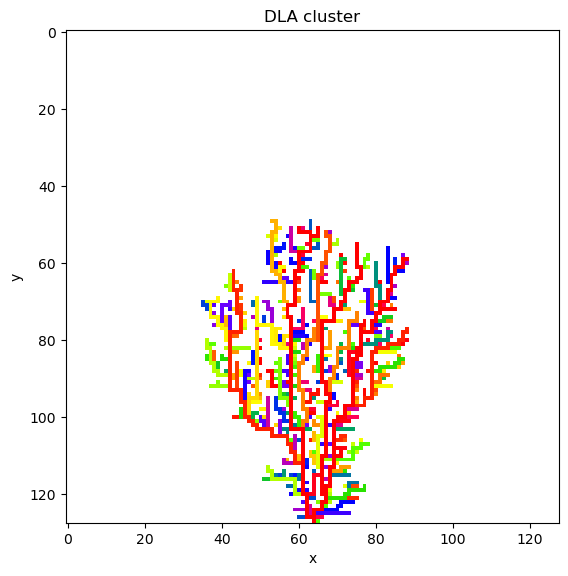

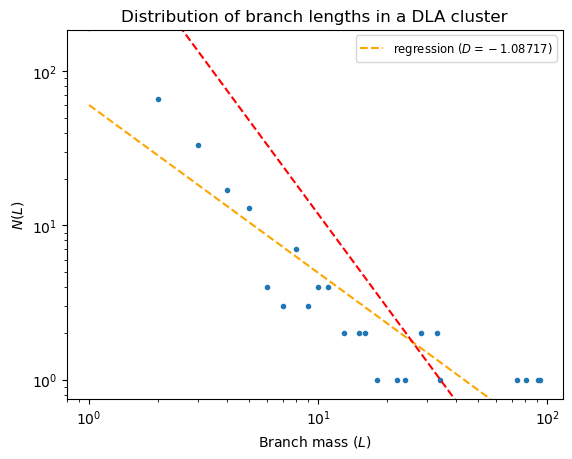

In [11]:
branch_lengths_unique, branch_length_counts, branches = csm.branch_distribution(current_lattice, seeds[0])
vt.plot_lattice(current_lattice, branches)
vt.plot_branch_length_distribution(branch_lengths_unique, branch_length_counts, branches)

## 5. Run Simulation Series

In [2]:
# Reload modules
reload(dm)
reload(ds)
reload(csm)
reload(vt)

<module 'vis_tools' from 'd:\\GitHub\\complex-system-simulation\\Project\\Code\\vis_tools.py'>

### 5.1 Lattice Dimensions / Neighbourhood Types

In [5]:
# Define environment parameter series (2D setup)
lattice_size_series = np.array([256])
max_timesteps_series = np.array([20000])
n_seeds_series = np.array([[1]])
particle_density_series = np.array([0.1])
target_mass_series = np.array([int(0.025 * lattice_size_series[0]**2),
                               int(0.05 * lattice_size_series[0]**2)])
obstacle_box_series = np.array([None])
drift_vec_series = np.array([[0, -1]])
sun_vec_series = np.array([[0, -1]])

# Define environment parameter series (3D setup)
# lattice_size_series = np.array([128])
# max_timesteps_series = np.array([2000])
# n_seeds_series = np.array([[1]])
# particle_density_series = np.array([0.1])
# target_mass_series = np.array([int(0.025 * lattice_size_series[0]**3),
#                                int(0.05 * lattice_size_series[0]**3)])
# obstacle_box_series = np.array([None])
# drift_vec_series = np.array([[0, 0, -1]])
# sun_vec_series = np.array([[0, 0, -1]])

# Define fixed simulation parameters
fdim_measure = 'both' # fractal dimension, can be None / 'cgrain' / 'radius' / 'both
calc_branch_distr = True
calc_mass = True
periodic = (False, False, False)
move_moore = False
aggr_moore = False
regen_mode = None

# Run simulations
n_sims = 30
sim_results, dla_evolutions = ds.analyse_dla_patterns(n_sims, lattice_size_series, max_timesteps_series, n_seeds_series, particle_density_series, target_mass_series,
                                                      obstacle_box_series=obstacle_box_series, drift_vec_series=drift_vec_series, sun_vec_series=sun_vec_series,
                                                      fdim_measure=fdim_measure, calc_branch_distr=calc_branch_distr, calc_mass=calc_mass,
                                                      n_saved_sims=1, periodic=periodic, move_moore=move_moore, aggr_moore=aggr_moore, regen_mode=regen_mode)

sim_results

Running parameters: lattice_size: 256; max_timesteps: 20000; seeds: [[128   0]]; particle_density: 0.1; target_mass: 1638; obstacle_boxes: None; drift_vec: [ 0 -1]; sun_vec: [ 0 -1]
Running simulation 1 of 30
Running simulation 2 of 30
Running simulation 3 of 30
Running simulation 4 of 30
Running simulation 5 of 30
Running simulation 6 of 30
Running simulation 7 of 30
Running simulation 8 of 30
Running simulation 9 of 30
Running simulation 10 of 30
Running simulation 11 of 30
Running simulation 12 of 30
Running simulation 13 of 30
Running simulation 14 of 30
Running simulation 15 of 30
Running simulation 16 of 30
Running simulation 17 of 30
Running simulation 18 of 30
Running simulation 19 of 30
Running simulation 20 of 30
Running simulation 21 of 30
Running simulation 22 of 30
Running simulation 23 of 30
Running simulation 24 of 30
Running simulation 25 of 30
Running simulation 26 of 30
Running simulation 27 of 30
Running simulation 28 of 30
Running simulation 29 of 30
Running simulat

,lattice_size,max_timesteps,seeds,particle_density,target_mass,obstacle_boxes,drift_vec,sun_vec,sim_measures,evol_ref
0,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0.0
1,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 3.0, 3.0, 3.0,...",NaN
2,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
3,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 2.0, 2.0, 2.0, 2.0, 2.0,...",NaN
4,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
5,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
6,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 2.0, 2.0, 2.0, 2.0,...",NaN
7,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 2.0,...",NaN
8,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 2.0, 2.0, 3.0, 3.0, 3.0,...",NaN
9,256,20000,"[[128, 0]]",0.1,1638,None,"[0, -1]","[0, -1]","{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN


In [52]:
sim_results.to_json('sim_results_lattice.json')

### 5.2. Environmental Parameters

The following series of simulations focus on the effect of varying environmental parameters (drift vector, sun vector, nutrient density) on the morphological features of the simulated coral. As the possible parameter combinations are countless, we decided to structure this exploration into four separate experiments, each one exploring the variation in a particular parameter while keeping the others fixed or confined within a narrower range.

The parameters of interest in this case are:
- The magnitude of the sun vector $|\vec{s}|$ - influencing how much the growth is biased towards the direction of the sun;
- The magnitude of the drift vector $|\vec{d}|$ - influencing how much the Random Walk of the particles (nutrients) is biased in a specific direction;
- The angle of the drift vector $\theta_d$ - influencing the direction of the Random Walk bias, particularly in relation to the sun vector;
- The density of particles (nutrients) $p$.

In [12]:
reload(ds)
reload(dm)

<module 'dla_model' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\dla_model.py'>

#### 5.2.1. Varying Sun Vector Magnitude

The variation in the sun vector magnitude has the effect of altering the neighbourhood weights when determining whether a particle should attach to an occupied lattice site. Defining $\vec{n_i}$ as a vector from a lattice site to one of its $n$ neighbours ($i=0,...,n$), the probability of attachment to a specific neighbour site is defined by normalizing the weight $w_i$ of a neighbour, resulting from the dot product with the inverse of the sun vector $\vec{s}$:

$$
w_i = <\vec{n_i}, -\vec{s}> + 1
$$

Thus, a normalized sun vector pointing vertically downwards results in 0.5 probability of attachment to a top site, 0.25 probability for either of the side neighbours and 0 probability for the bottom site. If the sun vector has a small magnitude ($< 1$), adding 1 to the dot product results in a non-zero probability even for the sites which are on the "shadow" side of the coral. Alternatively, with an increasing sun vector magnitude, the site facing it will get an increasing dominance over the others, leading to a very directional growth.

One way to interpret this magnitude is in terms of how diffuse the light is under water. Depending on the depth, refraction, murkiness or reflectiveness of the surroundings there could be coral parts growing in less illuminated regions. Alternatively, this vector could be interpreted as the dominance of zooxanthelae photosynthesis as a survival factor over the direction of incoming nutrients.

The simulation is run with the following parameters:

| $L$ | $t_{max}$ | $n_s$ | $p$ | $m_t$           | $\theta_d$            | $\|\vec{d}\|$ | $\|\vec{s}\|$ |
|-----|-----------|-------|-----|-----------------|-----------------------|---------------|---------------|
| 128 | 10000     | 1     | 0.1 | $0.05\times L^2$| $[-\pi/2,-\pi/4,0]$   | 0.5           |**0.01 to 100**|

In [2]:
# Define environment parameter series (2D setup)
lattice_size_series = np.array([128])
max_timesteps_series = np.array([9000])
n_seeds_series = np.repeat(int(1), 1)
particle_density_series = np.array([0.1])
target_mass_series = np.array([0.05 * lattice_size_series[0] ** 2], dtype=int)
obstacle_box_series = np.array([None])

# Define drift and sun vector ranges
angle_range = np.linspace(-0.5*np.pi, 0, 3)
drift_vec_series = np.column_stack((0.5*np.cos(angle_range), 0.5*np.sin(angle_range))) # Varying angle vectors with norm 0.5
sun_vec_series = np.column_stack((np.zeros(5), -(10.0 ** np.arange(-2, 2.5, 0.5))))  # Vertical vector with varying magnitude

# Define fixed simulation parameters
fdim_measure = 'both' # fractal dimension, can be None / 'cgrain' / 'radius' / 'both
calc_branch_distr = True
calc_mass = True
periodic = (False, False, False)
move_moore = False
aggr_moore = False
regen_mode = 'edge'

# Run simulations
n_sims = 30
sim_results, dla_evolutions = ds.analyse_dla_patterns(n_sims, lattice_size_series, max_timesteps_series, n_seeds_series, particle_density_series, target_mass_series,
                                                      drift_vec_series=drift_vec_series, sun_vec_series=sun_vec_series, obstacle_box_series=obstacle_box_series,
                                                      fdim_measure=fdim_measure, calc_branch_distr=calc_branch_distr, calc_mass=calc_mass,
                                                      n_saved_sims=1, periodic=periodic, move_moore=move_moore, aggr_moore=aggr_moore, regen_mode=regen_mode)

sim_results

Number of possible parameter combinations: 15
Running parameters: lattice_size: 128; max_timesteps: 9000; particle_density: 0.1; n_seeds: 1; target_mass: 819; obstacle_boxes: None; drift_vec: [ 3.061617e-17 -5.000000e-01]; sun_vec: [ 0.   -0.01]
Running simulation 1 of 30
Running simulation 2 of 30
Running simulation 3 of 30
Running simulation 4 of 30
Running simulation 5 of 30
Running simulation 6 of 30
Running simulation 7 of 30
Running simulation 8 of 30
Running simulation 9 of 30
Running simulation 10 of 30
Running simulation 11 of 30
Running simulation 12 of 30
Running simulation 13 of 30
Running simulation 14 of 30
Running simulation 15 of 30
Running simulation 16 of 30
Running simulation 17 of 30
Running simulation 18 of 30
Running simulation 19 of 30
Running simulation 20 of 30
Running simulation 21 of 30
Running simulation 22 of 30
Running simulation 23 of 30
Running simulation 24 of 30
Running simulation 25 of 30
Running simulation 26 of 30
Running simulation 27 of 30
Running

,lattice_size,max_timesteps,seeds,particle_density,target_mass,drift_vec,sun_vec,obstacle_boxes,sim_measures,evol_ref
0,128,9000,"[[64, 0]]",0.1,819,"[3.061616997868383e-17, -0.5]","[0.0, -0.01]",None,"{'mass_series': [1.0, 1.0, 2.0, 3.0, 3.0, 3.0,...",0.0
1,128,9000,"[[64, 0]]",0.1,819,"[3.061616997868383e-17, -0.5]","[0.0, -0.01]",None,"{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 2.0,...",NaN
2,128,9000,"[[64, 0]]",0.1,819,"[3.061616997868383e-17, -0.5]","[0.0, -0.01]",None,"{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
3,128,9000,"[[64, 0]]",0.1,819,"[3.061616997868383e-17, -0.5]","[0.0, -0.01]",None,"{'mass_series': [1.0, 1.0, 1.0, 2.0, 2.0, 2.0,...",NaN
4,128,9000,"[[64, 0]]",0.1,819,"[3.061616997868383e-17, -0.5]","[0.0, -0.01]",None,"{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 2.0,...",NaN
...,...,...,...,...,...,...,...,...,...,...
445,128,9000,"[[64, 0]]",0.1,819,"[0.5, 0.0]","[0.0, -100.0]",None,"{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
446,128,9000,"[[64, 0]]",0.1,819,"[0.5, 0.0]","[0.0, -100.0]",None,"{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
447,128,9000,"[[64, 0]]",0.1,819,"[0.5, 0.0]","[0.0, -100.0]",None,"{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
448,128,9000,"[[64, 0]]",0.1,819,"[0.5, 0.0]","[0.0, -100.0]",None,"{'mass_series': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN


In [3]:
sim_results.to_json('sim_results_sun_vector_mag.json')

#### 5.2.2. Varying Drift Vector Magnitude

Analogous to the sun vector, the drift vector also affects neighbourhood probabilities based on the dot product with the neighbour vectors. This results in varying probability of perturbing the particles in either neighbour direction during their Random Walk. If the drift is strong (i.e. a magnitude >> 1), then a stronger bias will be put on the movement in that direction, completely excluding a movement in a direction opposite to the vector. Alternatively, if the magnitude is smaller than 1, the probabilities shift in a way which permits such opposing movement. For vector magnitudes approaching zero, the drift loses signifficance, equalizing the probability of moving in any direction.

The drift can be used to model a combination of underwater currents and the effect of gravity on the influx of nutrients.

he simulation is run with the following parameters:

| $L$ | $t_{max}$ | $n_s$ | $p$ | $m_t$           |**$\|\vec{d}\|$**| $\theta_d$            | $\|\vec{s}\|$ |
|-----|-----------|-------|-----|-----------------|-----------------|-----------------------|---------------|
| 128 | 8000      | 1     | 0.1 | $0.05\times L^2$|**0.01 to 100**  | $-\pi/4$              | 0.5           |

In [ ]:
# Define environment parameter series (2D setup)
lattice_size_series = np.array([128])
max_timesteps_series = np.array([8000])
n_seeds_series = np.repeat(int(1), 1)
particle_density_series = np.array([0.1])
target_mass_series = np.array([0.05 * lattice_size_series[0] ** 2], dtype=int)
obstacle_box_series = np.array([None])

# Define drift and sun vector ranges
drift_vec_series = np.tile(- np.sqrt(0.5) * 10.0 ** np.arange(-2, 2.5, 0.5), (2, 1)).T # Varying magnitude 45 degree vectors
sun_vec_series = np.array([[0, -0.5]])

# Define fixed simulation parameters
fdim_measure = 'both' # fractal dimension, can be None / 'cgrain' / 'radius' / 'both
calc_branch_distr = True
calc_mass = True
periodic = (False, False, False)
move_moore = False
aggr_moore = False
regen_mode = 'edge'

# Run simulations
n_sims = 30
sim_results, dla_evolutions = ds.analyse_dla_patterns(n_sims, lattice_size_series, max_timesteps_series, n_seeds_series, particle_density_series, target_mass_series,
                                                      drift_vec_series=drift_vec_series, sun_vec_series=sun_vec_series, obstacle_box_series=obstacle_box_series,
                                                      fdim_measure=fdim_measure, calc_branch_distr=calc_branch_distr, calc_mass=calc_mass,
                                                      n_saved_sims=1, periodic=periodic, move_moore=move_moore, aggr_moore=aggr_moore, regen_mode=regen_mode)

sim_results

In [ ]:
sim_results.to_json('sim_results_drift_vector_mag.json')

#### 5.2.3. Varying Drift Vector Angle

The interest in exploring the variation of the drift vector angle $\theta_d$ arises from the question: What happens if the attachment preference and the predominant arrival direction of nutrients are not aligned? By keeping the sun vector fixed and altering the drift direction, the relationship between the two driving "forces" acting on the growth changes, potentially affecting the simulated coral morphology.

While the drift angle gradually changes from a purely vertical to a purely horizontal orientation, its magnitude is kept to 0.5, such that a non-zero probability is given to a "backward" motion.

The simulation is run with the following parameters:

| $L$ | $t_{max}$ | $n_s$ | $p$ | $m_t$           | $\|\vec{d}\|$ |**$\theta_d$**   | $\|\vec{s}\|$         |
|-----|-----------|-------|-----|-----------------|---------------|-----------------|-----------------------|
| 128 | 8000      | 1     | 0.1 | $0.05\times L^2$| 0.5           |**$-\pi/2$ to 0**| 0.5                   |

In [ ]:
# Define environment parameter series (2D setup)
lattice_size_series = np.array([128])
max_timesteps_series = np.array([8000])
n_seeds_series = np.repeat(int(1), 1)
particle_density_series = np.array([0.1])
target_mass_series = np.array([0.05 * lattice_size_series[0] ** 2], dtype=int)
obstacle_box_series = np.array([None])

# Define drift and sun vector ranges
angle_range = np.linspace(-0.5*np.pi, 0, 10)
drift_vec_series = np.vstack((np.cos(angle_range), np.sin(angle_range))).T # Varying angle vectors with norm 1
sun_vec_series = np.array([[0, -0.5]])

# Define fixed simulation parameters
fdim_measure = 'both' # fractal dimension, can be None / 'cgrain' / 'radius' / 'both
calc_branch_distr = True
calc_mass = True
periodic = (False, False, False)
move_moore = False
aggr_moore = False
regen_mode = 'edge'

# Run simulations
n_sims = 30
sim_results, dla_evolutions = ds.analyse_dla_patterns(n_sims, lattice_size_series, max_timesteps_series, n_seeds_series, particle_density_series, target_mass_series,
                                                      drift_vec_series=drift_vec_series, sun_vec_series=sun_vec_series, obstacle_box_series=obstacle_box_series,
                                                      fdim_measure=fdim_measure, calc_branch_distr=calc_branch_distr, calc_mass=calc_mass,
                                                      n_saved_sims=1, periodic=periodic, move_moore=move_moore, aggr_moore=aggr_moore, regen_mode=regen_mode)

sim_results

In [ ]:
sim_results.to_json('sim_results_drift_vector_angle.json')

#### 5.2.4. Varying Nutrient Density

The abundance of nutrient particles may affect the time for the development of a DLA cluster of a specific mass. It is also an interesting question whether a more massive influx of particles, perhaps combined with correlations caused by the limited lattice space, has any measurable effects on the simulated coral morphology. For this, a variation in the nutrient density is explored under a fixed sun magnitude of 0.5 and various drift vectors differing both in magnitude and in angle. With such a combination of parameters it is possible to explore the effect of the transport of different nutrient masses through space.

The parameters are as follows:

| $L$ | $t_{max}$ | $n_s$ | **p**           | $m_t$           | $\|\vec{d}\|$ |$\theta_d$       | $\|\vec{s}\|$         |
|-----|-----------|-------|-----------------|-----------------|---------------|-----------------|-----------------------|
| 128 | 8000      | 1     |**0.025 to 0.25**| $0.05\times L^2$| 0.01 to 100   |**$-\pi/2$ to 0**| 0.5                   |

In [ ]:
# Define environment parameter series (2D setup)
lattice_size_series = np.array([128])
max_timesteps_series = np.array([40000])
n_seeds_series = np.repeat(int(1), 1)
particle_density_series = 0.025 * 10 ** np.linspace(0, 1, 5) # Varying nutrient density
target_mass_series = np.array([0.05 * lattice_size_series[0] ** 2], dtype=int)
obstacle_box_series = np.array([None])

# Define drift and sun vector ranges
drift_vec_mags = np.tile(np.sqrt(0.5) * 10.0 ** np.arange(-2, 3), (2, 1)).T # Varying magnitude 45 degree vectors
angle_range = np.linspace(-0.5*np.pi, 0, 3)
drift_vec_angles = np.vstack((np.cos(angle_range), np.sin(angle_range))).T # Varying angle vectors with norm 1
drift_vec_series = np.concatenate((drift_vec_mags, drift_vec_angles)) #  Combine both vector series
sun_vec_series = np.array([[0, -0.5]])

# Define fixed simulation parameters
fdim_measure = 'both' # fractal dimension, can be None / 'cgrain' / 'radius' / 'both
calc_branch_distr = True
calc_mass = True
periodic = (False, False, False)
move_moore = False
aggr_moore = False
regen_mode = 'edge'

# Run simulations
n_sims = 30
sim_results, dla_evolutions = ds.analyse_dla_patterns(n_sims, lattice_size_series, max_timesteps_series, n_seeds_series, particle_density_series, target_mass_series,
                                                      drift_vec_series=drift_vec_series, sun_vec_series=sun_vec_series, obstacle_box_series=obstacle_box_series,
                                                      fdim_measure=fdim_measure, calc_branch_distr=calc_branch_distr, calc_mass=calc_mass,
                                                      n_saved_sims=1, periodic=periodic, move_moore=move_moore, aggr_moore=aggr_moore, regen_mode=regen_mode)

sim_results

In [ ]:
sim_results.to_json('sim_results_density.json')

## 6. Analyse Simulation Results

In [9]:
reload(ds)
reload(vt)
reload(csm)

<module 'cs_measures' from 'd:\\Msc Computational Science\\S01P03\\Complex System Simulation\\00 Github\\complex-system-simulation\\Project\\Code\\cs_measures.py'>

(128, 0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit


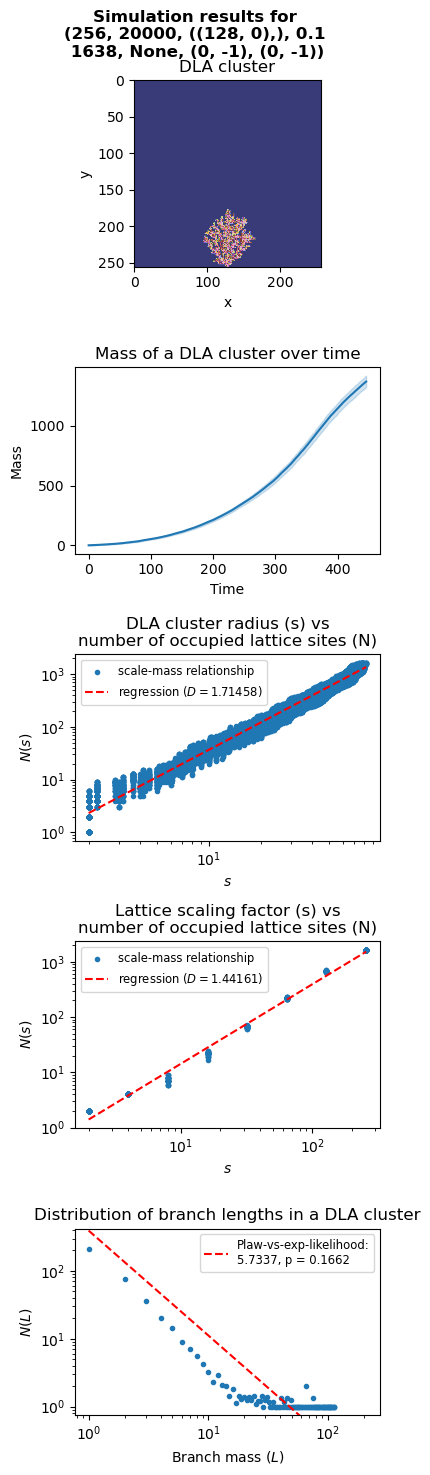

(128, 0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit


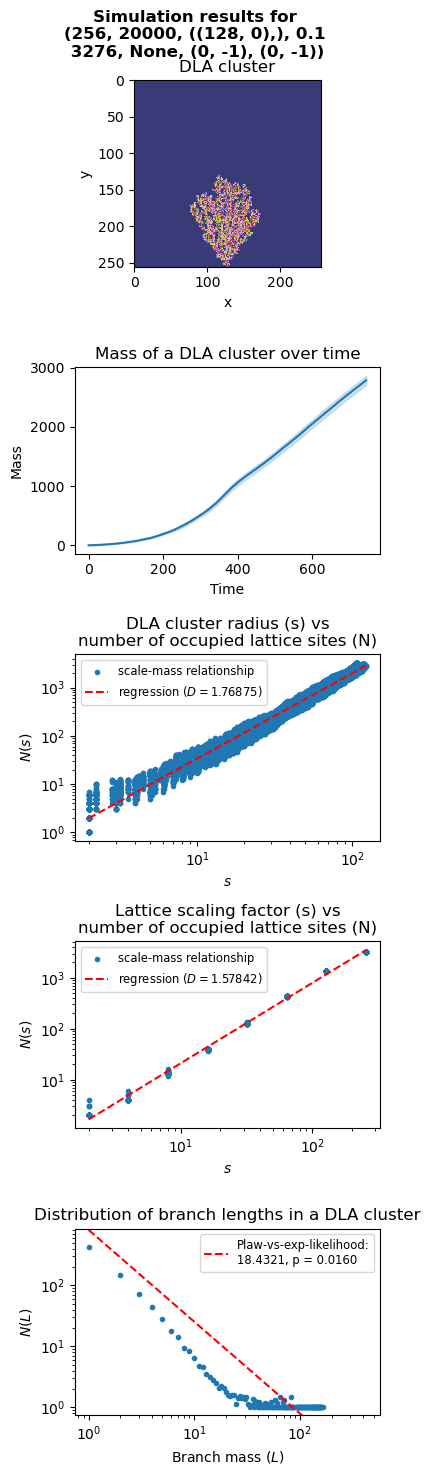

In [6]:
ds.analyse_sim_results(sim_results, dla_evolutions=dla_evolutions)